In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
num_arms = 10
mean = 0.5
stddev = 0.1
arms = np.random.normal(mean, stddev, size=num_arms)

In [ ]:
class UCBBandit:
    def __init__(self, num_arms, c):
        self.num_arms = num_arms
        self.c = c
        self.q_values = np.zeros(num_arms)
        self.counts = np.zeros(num_arms)
        self.total_counts = 0

    def select_action(self):
        ucb_values = self.q_values + self.c * np.sqrt(np.log(self.total_counts + 1) / (self.counts + 1e-5))
        return np.argmax(ucb_values)

    def update(self, action, reward):
        self.counts[action] += 1
        self.total_counts += 1
        alpha = 1 / self.counts[action]
        self.q_values[action] += alpha * (reward - self.q_values[action])

In [ ]:
num_trials = 1000
c = 2  # UCB parameter

bandit = UCBBandit(num_arms=num_arms, c=c)
rewards = []

for i in range(num_trials):
    action = bandit.select_action()
    reward = np.random.binomial(1, arms[action])
    bandit.update(action, reward)
    rewards.append(reward)
print("Q-values: ", bandit.q_values)

Q-values:  [0.53658537 0.4494382  0.38888889 0.54330709 0.51724138 0.29090909
 0.30357143 0.5        0.48514851 0.58169935]


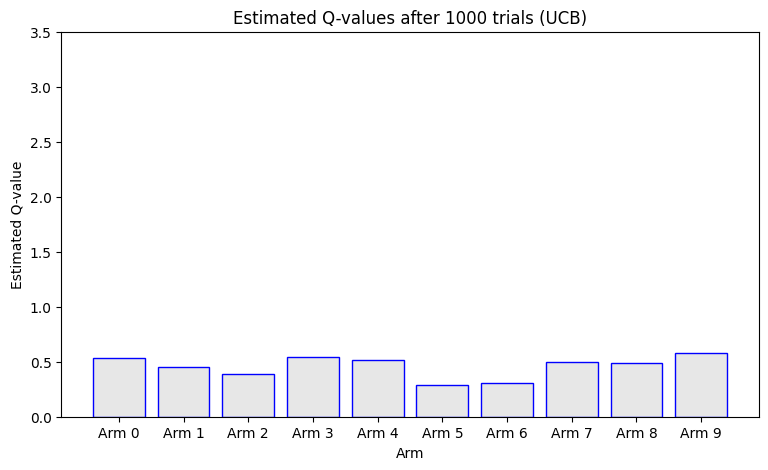

In [ ]:
# Plot the estimated Q-values
plt.figure(figsize=[9, 5])
plt.bar(range(num_arms), bandit.q_values, color=(0.1, 0.1, 0.1, 0.1), edgecolor='blue')
plt.xlabel('Arm')
plt.ylabel('Estimated Q-value')
plt.xticks(range(num_arms), ['Arm {}'.format(i) for i in range(num_arms)])
plt.ylim(0, 3.5)
plt.title('Estimated Q-values after 1000 trials (UCB)')
plt.show()

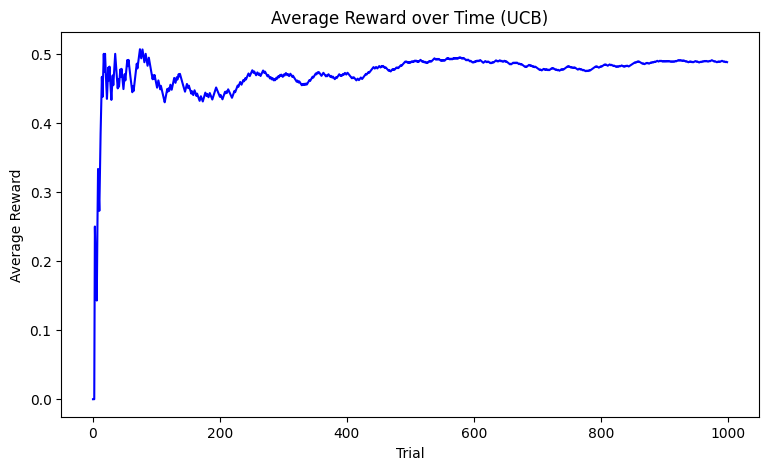

In [ ]:
cumulative_rewards = np.cumsum(rewards)
average_rewards = cumulative_rewards / np.arange(1, num_trials + 1)
plt.figure(figsize=[9, 5])
plt.plot(average_rewards, color='blue')
plt.xlabel('Trial')
plt.ylabel('Average Reward')
plt.title('Average Reward over Time (UCB)')
plt.show()